<a href="https://colab.research.google.com/github/mohammed-suffiyan/batterymodelling_physicsbased/blob/main/DFN_LFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyBamm DFN model


# DFN model of LFP cell


In [ ]:

!pip uninstall -y pybamm numpy matplotlib


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0


In [ ]:
!pip install numpy==1.24.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires matplotlib>=3.0.0, which is not installed.
bigframes 2.4.0 requires matplotlib>=3.7.1, which is not installed.
matplotlib-venn 1.1.2 requires matplotlib, which is not installed.
datascience 0.17.6 requires matplotlib>=3.0.0, which is not installed.
music21 9.3.0 requires matplotlib, which is not installed.
wordcloud 1.9.4 requires matplotlib, which is not installed.
plotnine 0.14.5 requires matplotlib>=3.8.0, which is not installed.
missingno 0.5.2 requires matplotlib, which is not installed.
fastai 2.7.19 requires matplotlib, which is not installed.
prophet 1.1.6 requires matplotlib>=2.0.0, which is not installed.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, which is not installed.
yellowbrick 1.5 requires m

In [ ]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.


In [ ]:
!pip install pybamm==25.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.2/773.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 90.1 MB/s eta 0:00:00


In [ ]:
import pybamm

PyBaMM can collect usage data and send it to the PyBaMM team to help us improve the software.
We do not collect any sensitive information such as models, parameters, or simulation results - only information on which parts of the code are being used and how frequently.
This is entirely optional and does not impact the functionality of PyBaMM.
For more information, see https://docs.pybamm.org/en/latest/source/user_guide/index.html#telemetry

Timeout reached. Defaulting to not enabling telemetry.
Do you want to enable telemetry? (Y/n): n


In [ ]:
model = pybamm.lithium_ion.SPMe({
    "SEI": "ec reaction limited",
    "SEI porosity change": "true",
    "loss of active material": "none",
})


In [ ]:
param = pybamm.ParameterValues("Chen2020")

In [ ]:
experiment = pybamm.Experiment([
    "Charge at 0.5C until 3.65 V",
    "Rest for 1 hour",
    "Discharge at 0.5C until 2.5 V",
    "Rest for 1 hour"
] * 500)

In [ ]:
sim = pybamm.Simulation(model, parameter_values=param, experiment=experiment)

2025-06-05 05:27:12.638 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.


In [ ]:
solution = sim.solve()

2025-06-05 05:27:16.299 - [WARNING] simulation.solve(871): Step 'Charge at 0.5C until 3.65 V' is infeasible at initial conditions, but skip_ok is True. Skipping step.


In [ ]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3035.0577133412003, step=30.350577133412003)…

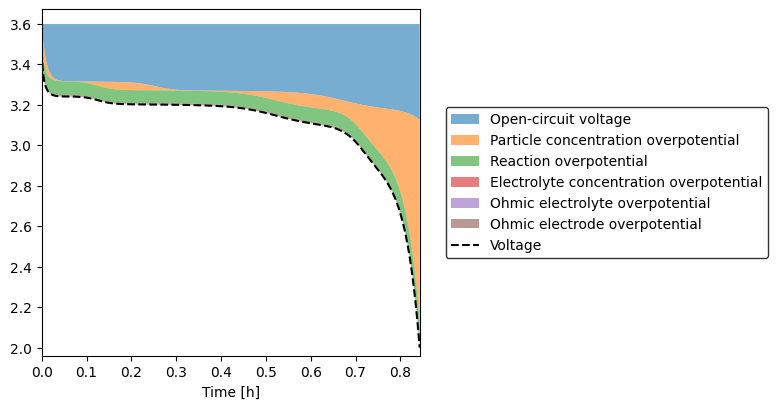

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [ ]:
sim.plot_voltage_components()

In [ ]:
# Print all parameters and their values
for key, value in param.items():
    print(f"{key} : {value}")

Ideal gas constant [J.K-1.mol-1] : 8.31446261815324
Faraday constant [C.mol-1] : 96485.33212331001
Boltzmann constant [J.K-1] : 1.380649e-23
Electron charge [C] : 1.602176634e-19
Negative electrode thickness [m] : 3.4e-05
Separator thickness [m] : 2.5e-05
Positive electrode thickness [m] : 8e-05
Electrode height [m] : 0.6
Electrode width [m] : 0.3
Nominal cell capacity [A.h] : 2.3
Current function [A] : 2.3
Contact resistance [Ohm] : 0
Negative electrode conductivity [S.m-1] : 215.0
Maximum concentration in negative electrode [mol.m-3] : 30555
Negative particle diffusivity [m2.s-1] : 3e-15
Negative electrode OCP [V] : <function graphite_LGM50_ocp_Chen2020 at 0x78e94ae7ba60>
Negative electrode porosity : 0.36
Negative electrode active material volume fraction : 0.58
Negative particle radius [m] : 5e-06
Negative electrode Bruggeman coefficient (electrolyte) : 1.5
Negative electrode Bruggeman coefficient (electrode) : 1.5
Negative electrode charge transfer coefficient : 0.5
Negative elect